In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from knn_classification import MyKNNClf

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=5, n_informative=3, random_state=42)
X = pd.DataFrame(X).round(2)
y = pd.Series(y)
X.columns = [f'col_{col}' for col in X.columns]
sameples = 100
X_test = X.sample(sameples, random_state=42) + np.random.normal(0, 1, (sameples, X.shape[1]))

In [3]:
X_test.head()

,col_0,col_1,col_2,col_3,col_4
1501,-2.797778,-0.674758,2.817572,-0.182471,-0.678673
2586,0.109570,-0.251011,-0.522068,0.855714,1.088821
2653,-1.800576,-0.566643,-1.049964,0.416067,-0.970798
1055,1.818335,1.442603,1.483642,-1.830441,0.916343
705,2.212807,0.781267,-2.828333,0.838403,-0.941153


<AxesSubplot:xlabel='col_0', ylabel='col_4'>

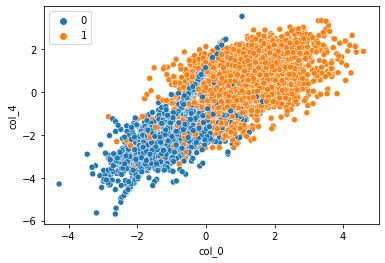

In [4]:
sns.scatterplot(x = X['col_0'], y = X['col_4'], hue = y)

<AxesSubplot:xlabel='col_0', ylabel='col_4'>

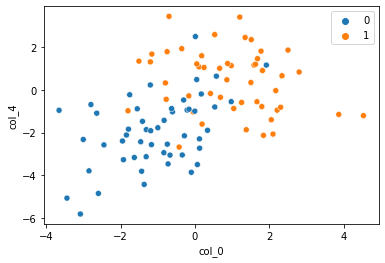

In [5]:
knn = MyKNNClf(3)
knn.fit(X, y)
y_test = knn.predict(X_test)
sns.scatterplot(x = X_test['col_0'], y = X_test['col_4'], hue = y_test)

<AxesSubplot:xlabel='col_0', ylabel='col_4'>

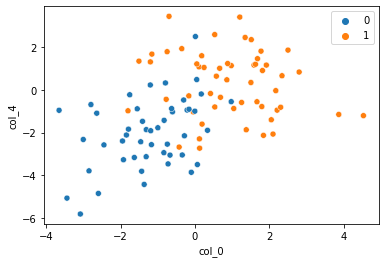

In [6]:
knn = MyKNNClf(10, metric='manhattan', weight = 'rank')
knn.fit(X, y)
y_test = knn.predict(X_test)
sns.scatterplot(x = X_test['col_0'], y = X_test['col_4'], hue = y_test)

<AxesSubplot:xlabel='col_0', ylabel='col_4'>

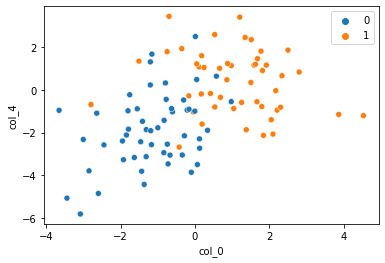

In [7]:
knn = MyKNNClf(5, metric='cosine', weight = 'distance')
knn.fit(X, y)
y_test = knn.predict(X_test)
sns.scatterplot(x = X_test['col_0'], y = X_test['col_4'], hue = y_test)

In [8]:
df_test = X_test.copy()
knn_1 = MyKNNClf(3)
knn_1.fit(X, y)
df_test[f'{knn_1.k}_{knn_1.metric}_{knn_1.weight}'] = knn_1.predict_proba(X_test)

In [9]:
knn_2 = MyKNNClf(5, metric='manhattan', weight='rank')
knn_2.fit(X, y)
df_test[f'{knn_2.k}_{knn_2.metric}_{knn_2.weight}'] = knn_2.predict_proba(X_test)

In [10]:
knn_3 = MyKNNClf(10, metric='cosine', weight='distance')
knn_3.fit(X, y)
df_test[f'{knn_3.k}_{knn_3.metric}_{knn_3.weight}'] = knn_3.predict_proba(X_test)

In [11]:
df_test.head()

,col_0,col_1,col_2,col_3,col_4,3_euclidean_uniform,5_manhattan_rank,10_cosine_distance
1501,-2.797778,-0.674758,2.817572,-0.182471,-0.678673,0.333333,0.00000,0.400002
2586,0.109570,-0.251011,-0.522068,0.855714,1.088821,1.000000,1.00000,1.000000
2653,-1.800576,-0.566643,-1.049964,0.416067,-0.970798,1.000000,0.80292,-0.000000
1055,1.818335,1.442603,1.483642,-1.830441,0.916343,1.000000,1.00000,1.000000
705,2.212807,0.781267,-2.828333,0.838403,-0.941153,1.000000,1.00000,1.000000
